In [1]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statistics as st
sys.path.insert(0,'../scripts/')
from process import *


In [2]:
telecom_df = pd.read_csv('../data/telecom_clean_data.csv')
telecom_df.drop("Unnamed: 0",axis=1,inplace=True)

In [3]:
telecom_df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
telecom_df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0



Top 10 handsets used by the customers

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: count, dtype: int64

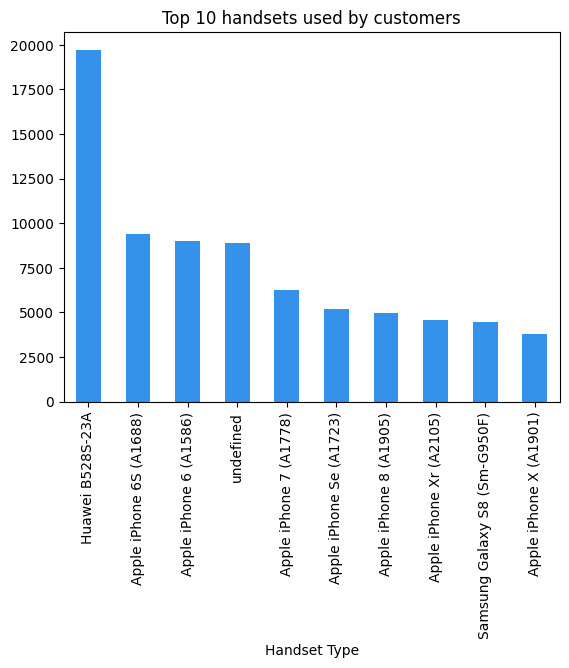

In [5]:
handset_type= telecom_df['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

Top 3 handset manufacturers

Handset Manufacturer
Apple      59339
Samsung    40429
Huawei     34296
Name: count, dtype: int64

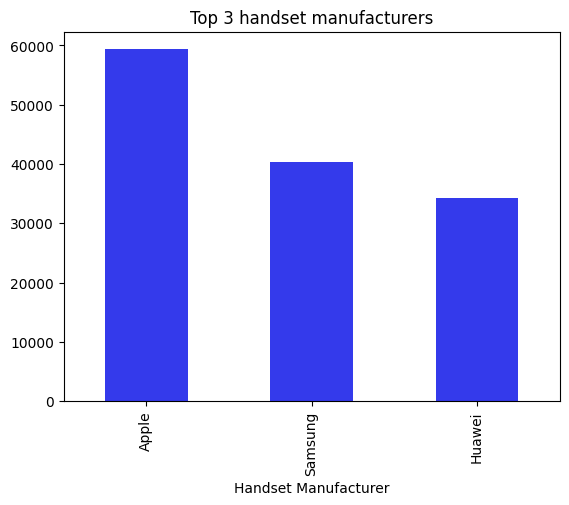

In [6]:
Handset_manufacturers = telecom_df['Handset Manufacturer'].value_counts()[0:3]
Handset_manufacturers.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manufacturers

Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

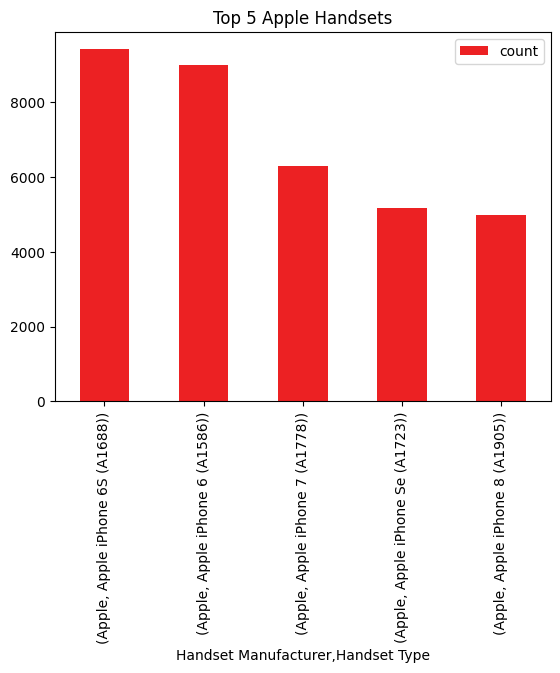

In [7]:
top_apple = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#ec2123')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

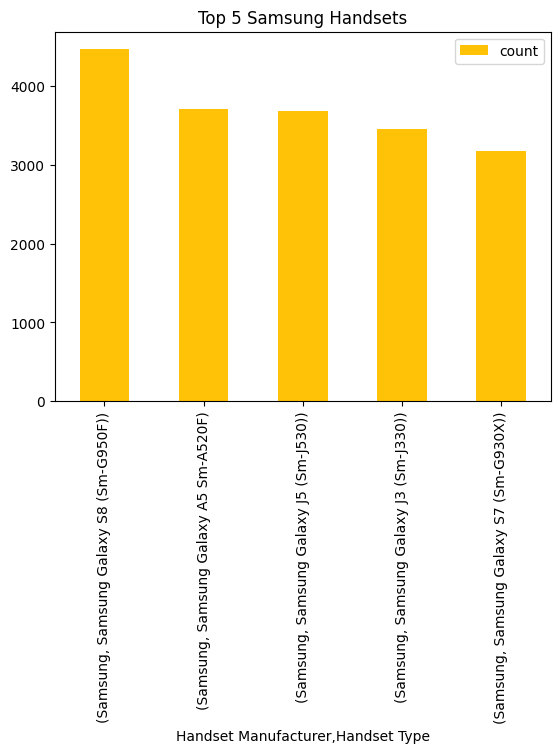

In [8]:
top_samsung = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#ffc206')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

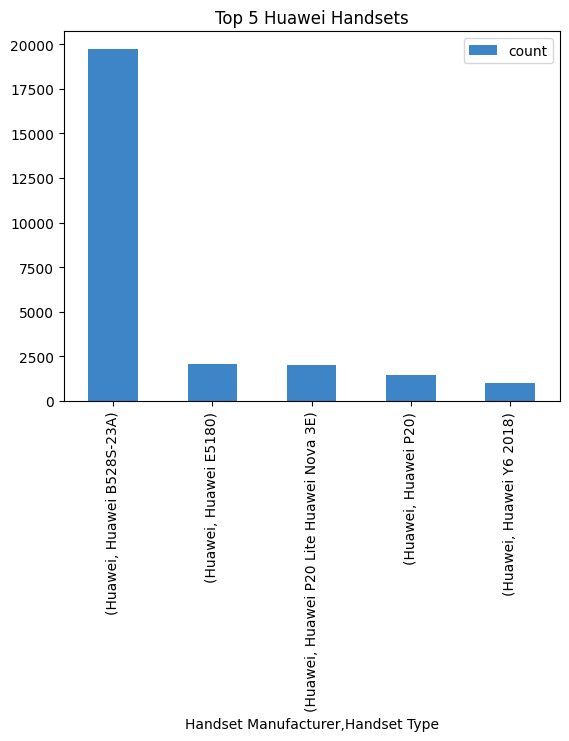

In [9]:
top_huawei = telecom_df.loc[telecom_df['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#3d85c6')
top_huawei

The analysis's conclusion reveals:

• The Huawei B528S-23A is the most popular phone model among customers. It is produced by Huawei.

• The top three manufacturers of smartphones are: Apple with 59339, Samsung with 40429, and Huawei with 34296.

• Customers do not prefer Apple's handsets over Samsung's, and Samsung manufacturers the same as Apple does.

• It is advised that Huawei Handsets manufacturers expand their manufacturing capacity in order to better serve clients.






Task 2.1

number of xDR sessions


In [10]:
xDR_session_per_user = telecom_df.groupby('MSISDN/Number')['Bearer Id'].sum()
xDR_session_per_user

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    1.462771e+19
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106471, dtype: float64

Session duration

In [11]:
session_duration_per_user = telecom_df.groupby('MSISDN/Number')['Dur. (ms)'].sum()
session_duration_per_user

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106471, dtype: float64

the total download (DL) and upload (UL) data


In [12]:
total_ul = telecom_df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()
total_dl = telecom_df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
print(f'total upload:\n{total_ul}\n\ntotal download:\n{total_dl}\n\ntotal upload + download: {total_dl+total_ul}')


total upload:
MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732243.0
3.197021e+12    37295915.0
3.370000e+14    56652839.0
8.823971e+14    60456049.0
Name: Total UL (Bytes), Length: 106471, dtype: float64

total download:
MSISDN/Number
3.360100e+10    8.426375e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    6.879252e+08
3.379000e+10    4.445751e+08
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106471, dtype: float64

total upload + download: MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3

the total data volume (in Bytes) during this session for each application


In [13]:
total_google = telecom_df['Google DL (Bytes)'] + telecom_df['Google UL (Bytes)']
total_email = telecom_df['Email DL (Bytes)'] + telecom_df['Email UL (Bytes)']
total_gaming = telecom_df['Gaming DL (Bytes)'] + telecom_df['Gaming UL (Bytes)']

total_youtube = telecom_df['Youtube DL (Bytes)'] + telecom_df['Youtube UL (Bytes)']
total_netflix = telecom_df['Netflix DL (Bytes)'] + telecom_df['Netflix UL (Bytes)']
total_social = telecom_df['Social Media DL (Bytes)'] + telecom_df['Social Media UL (Bytes)']
total_other = telecom_df['Other DL (Bytes)'] + telecom_df['Other UL (Bytes)']

# add the total data volumes on the main data set
telecom_df['total_google'] = total_google
telecom_df['total_email'] = total_email
telecom_df['total_gaming'] = total_gaming

telecom_df['total_youtube'] = total_youtube
telecom_df['total_netflix'] = total_netflix
telecom_df['total_social'] = total_social
telecom_df['total_other'] = total_other

# aggregate total data volume per application
# google
total_data_volume_per_user_google = telecom_df.groupby('MSISDN/Number')['total_google'].sum()
print(f'{total_data_volume_per_user_google}\n')

# email
total_data_volume_per_user_email = telecom_df.groupby('MSISDN/Number')['total_email'].sum()
print(f'{total_data_volume_per_user_email}\n')

# gaming
total_data_volume_per_user_gaming = telecom_df.groupby('MSISDN/Number')['total_gaming'].sum()
print(f'{total_data_volume_per_user_gaming}\n')

# youtube
total_data_volume_per_user_youtube = telecom_df.groupby('MSISDN/Number')['total_youtube'].sum()
print(f'{total_data_volume_per_user_youtube}\n')

# netflix
total_data_volume_per_user_netflix = telecom_df.groupby('MSISDN/Number')['total_netflix'].sum()
print(f'{total_data_volume_per_user_netflix}\n') 

# social
total_data_volume_per_user_social = telecom_df.groupby('MSISDN/Number')['total_social'].sum()
print(f'{total_data_volume_per_user_social}\n')

# other
total_data_volume_per_user_other = telecom_df.groupby('MSISDN/Number')['total_other'].sum()
print(f'{total_data_volume_per_user_other}\n')

MSISDN/Number
3.360100e+10     4389005.0
3.360100e+10     5334863.0
3.360100e+10     3443126.0
3.360101e+10     9678493.0
3.360101e+10    18499616.0
                   ...    
3.379000e+10     7531269.0
3.379000e+10     5429705.0
3.197021e+12    10438660.0
3.370000e+14     9830617.0
8.823971e+14     9218647.0
Name: total_google, Length: 106471, dtype: float64



MSISDN/Number
3.360100e+10    1331362.0
3.360100e+10    3307781.0
3.360100e+10    3205380.0
3.360101e+10    2284670.0
3.360101e+10    3305469.0
                  ...    
3.379000e+10    1006915.0
3.379000e+10    2514097.0
3.197021e+12    1520771.0
3.370000e+14    3318582.0
8.823971e+14    3330974.0
Name: total_email, Length: 106471, dtype: float64

MSISDN/Number
3.360100e+10    8.124587e+08
3.360100e+10    1.197501e+08
3.360100e+10    5.388277e+08
3.360101e+10    3.911261e+08
3.360101e+10    1.314798e+09
                    ...     
3.379000e+10    6.603614e+08
3.379000e+10    4.370033e+08
3.197021e+12    1.780487e+08
3.370000e+14    5.101427e+08
8.823971e+14    4.307026e+07
Name: total_gaming, Length: 106471, dtype: float64

MSISDN/Number
3.360100e+10    21624548.0
3.360100e+10    12432223.0
3.360100e+10    21333570.0
3.360101e+10     6977321.0
3.360101e+10    41533002.0
                   ...    
3.379000e+10    26647843.0
3.379000e+10    19851572.0
3.197021e+12    11959905.0
3.37000

Task 2.2


Analyze the basic metrics (mean, median, etc) in the Dataset

In [14]:
relevant_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google', 'total_email', 'total_gaming', 'total_youtube', 'total_netflix', 'total_social', 'total_other']


print("Mean\n", telecom_df[relevant_features].mean(), '\n')
print("Median\n", telecom_df[relevant_features].median(), '\n')

mode_series = pd.Series(telecom_df[relevant_features].mode().values[0], index=relevant_features)
print("Mode\n", mode_series, '\n')

print("Highest\n", telecom_df[relevant_features].max(), '\n')
print("lowest\n", telecom_df[relevant_features].min(), '\n')


Mean
 Dur. (ms)                    1.050841e+05
Activity Duration DL (ms)    1.837842e+06
Activity Duration UL (ms)    1.414773e+06
Social Media DL (Bytes)      1.795144e+06
Social Media UL (Bytes)      3.292209e+04
Google DL (Bytes)            5.751770e+06
Google UL (Bytes)            2.056293e+06
Email DL (Bytes)             1.791785e+06
Email UL (Bytes)             4.674035e+05
Youtube DL (Bytes)           1.163387e+07
Youtube UL (Bytes)           1.100857e+07
Netflix DL (Bytes)           1.162724e+07
Netflix UL (Bytes)           1.100190e+07
Gaming DL (Bytes)            4.220642e+08
Gaming UL (Bytes)            8.289600e+06
Other DL (Bytes)             4.211525e+08
Other UL (Bytes)             8.262685e+06
Total UL (Bytes)             4.111937e+07
Total DL (Bytes)             4.546640e+08
total_google                 7.808063e+06
total_email                  2.259188e+06
total_gaming                 4.303538e+08
total_youtube                2.264244e+07
total_netflix               


Non-Graphical Univariate Analysis


Computing dispersion parameters for each quantitative variable

In [15]:
sub_relevant_features = ['MSISDN/Number','Dur. (ms)','Total UL (Bytes)', 'Total DL (Bytes)', 'total_google','total_email','total_gaming','total_youtube','total_netflix','total_social', 'total_other']

telecom_df[sub_relevant_features].describe()

,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),total_google,total_email,total_gaming,total_youtube,total_netflix,total_social,total_other
count,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,4.190654e+10,1.050841e+05,4.111937e+07,4.546640e+08,7.808063e+06,2.259188e+06,4.303538e+08,2.264244e+07,2.262914e+07,1.828066e+06,4.294152e+08
std,2.450976e+12,8.107274e+04,1.127844e+07,2.441791e+08,3.516724e+06,1.071152e+06,2.440569e+08,9.247684e+06,9.260477e+06,1.035638e+06,2.432284e+08
min,3.360100e+10,7.142000e+03,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03,1.490450e+05
25%,3.365131e+10,5.824875e+04,3.321828e+07,2.431263e+08,4.944994e+06,1.359336e+06,2.187362e+08,1.599374e+07,1.598016e+07,9.321828e+05,2.186682e+08
50%,3.366371e+10,8.639900e+04,4.114196e+07,4.559408e+08,7.815669e+06,2.264186e+06,4.316585e+08,2.266131e+07,2.263632e+07,1.825931e+06,4.300438e+08
75%,3.368352e+10,1.329328e+05,4.903252e+07,6.657542e+08,1.068307e+07,3.160024e+06,6.415282e+08,2.929824e+07,2.928832e+07,2.727493e+06,6.398960e+08
max,8.823971e+14,1.859336e+06,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06,8.595209e+08


insight

• Users upload less content than they download

• A greater number of users submit data than download data

• Gamers spend more money on games than on other channels like social media.


Graphical Univariate Analysis

In [16]:
for cols in relevant_features:
    print(cols)
    print("Mean", st.mean(telecom_df[cols]))
   
    print("Mode", st.mode(telecom_df[cols]))

    print("Median", st.median(telecom_df[cols]))
    
    print("Variance", st.variance(telecom_df[cols]))

    print("St. Dev", st.stdev(telecom_df[cols]))
    print("Skew", telecom_df[cols].skew())
    print('----')

Dur. (ms)
Mean 105084.0549742098
Mode 86399.0
Median 86399.0
Variance 6572789166.803576
St. Dev 81072.7399734558
Skew 3.9687972251832586
----
Activity Duration DL (ms)
Mean 1837842.1849150877
Mode 0.0
Median 39018.5
Variance 32694427227190.77
St. Dev 5717904.093913326
Skew 5.852520525553382
----
Activity Duration UL (ms)
Mean 1414772.7676996216
Mode 0.0
Median 46481.0
Variance 21732788866687.87
St. Dev 4661843.93418397
Skew 7.357988486520479
----
Social Media DL (Bytes)
Mean 1795144.1077936245
Mode 2865700.0
Median 1793860.5
Variance 1072198340559.8076
St. Dev 1035470.1060676777
Skew -0.0017840427941975946
----
Social Media UL (Bytes)
Mean 32922.085511696496
Mode 30810.0
Median 32917.0
Variance 361341635.26031506
St. Dev 19008.988275558357
Skew -0.00018635496084545364
----
Google DL (Bytes)
Mean 5751770.333185191
Mode 6296014.0
Median 5767399.0
Variance 10947859331632.477
St. Dev 3308754.951886355
Skew -0.00864228060542617
----
Google UL (Bytes)
Mean 2056292.5512571882
Mode 3426526.0
M

Graphical Univariate

Univariate analysis

number of xDR sessions

In [17]:
telecom_df[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,1.485060e+05
mean,1.050846e+08
std,8.107273e+07
min,7.142988e+06
25%,5.824964e+07
50%,8.639999e+07
75%,1.329333e+08
max,1.859336e+09


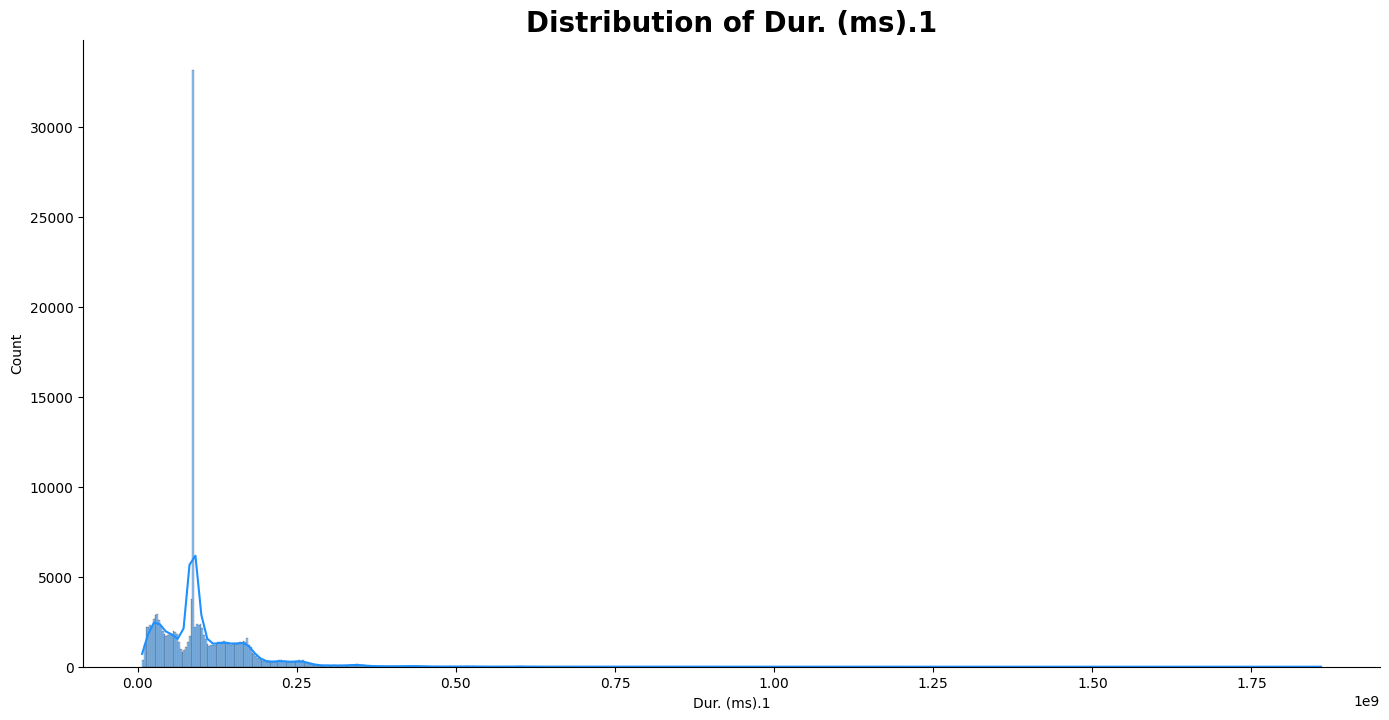

In [18]:
plot_hist(telecom_df, 'Dur. (ms).1', 'dodgerblue')

Total Upload

In [44]:
telecom_df[['Total UL (Bytes)']].describe()

,Total UL (Bytes)
count,1.485060e+05
mean,4.111937e+07
std,1.127844e+07
min,2.866892e+06
25%,3.321828e+07
50%,4.114196e+07
75%,4.903252e+07
max,7.833131e+07


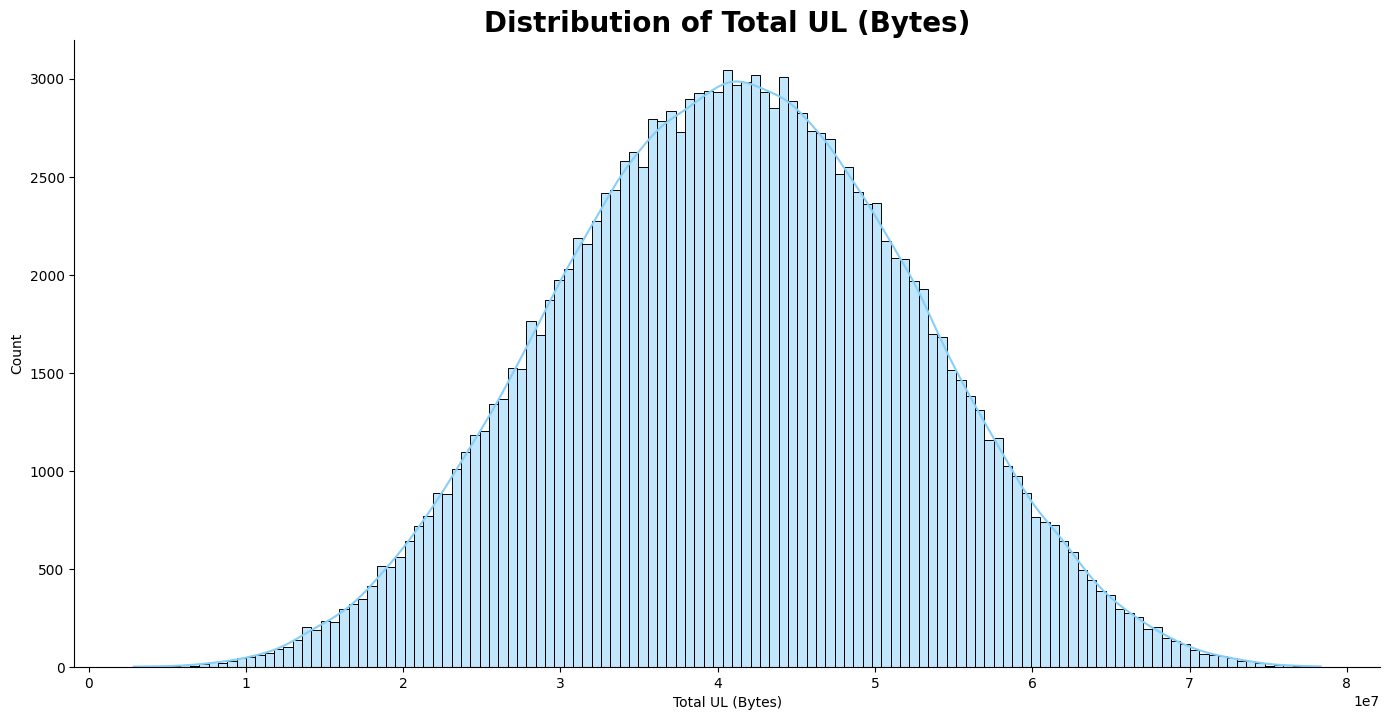

In [45]:
plot_hist(telecom_df, 'Total UL (Bytes)', '#87CEFA')


Total Downloads Bytes

In [46]:
telecom_df[['Total DL (Bytes)']].describe()

,Total DL (Bytes)
count,1.485060e+05
mean,4.546640e+08
std,2.441791e+08
min,7.114041e+06
25%,2.431263e+08
50%,4.559408e+08
75%,6.657542e+08
max,9.029696e+08


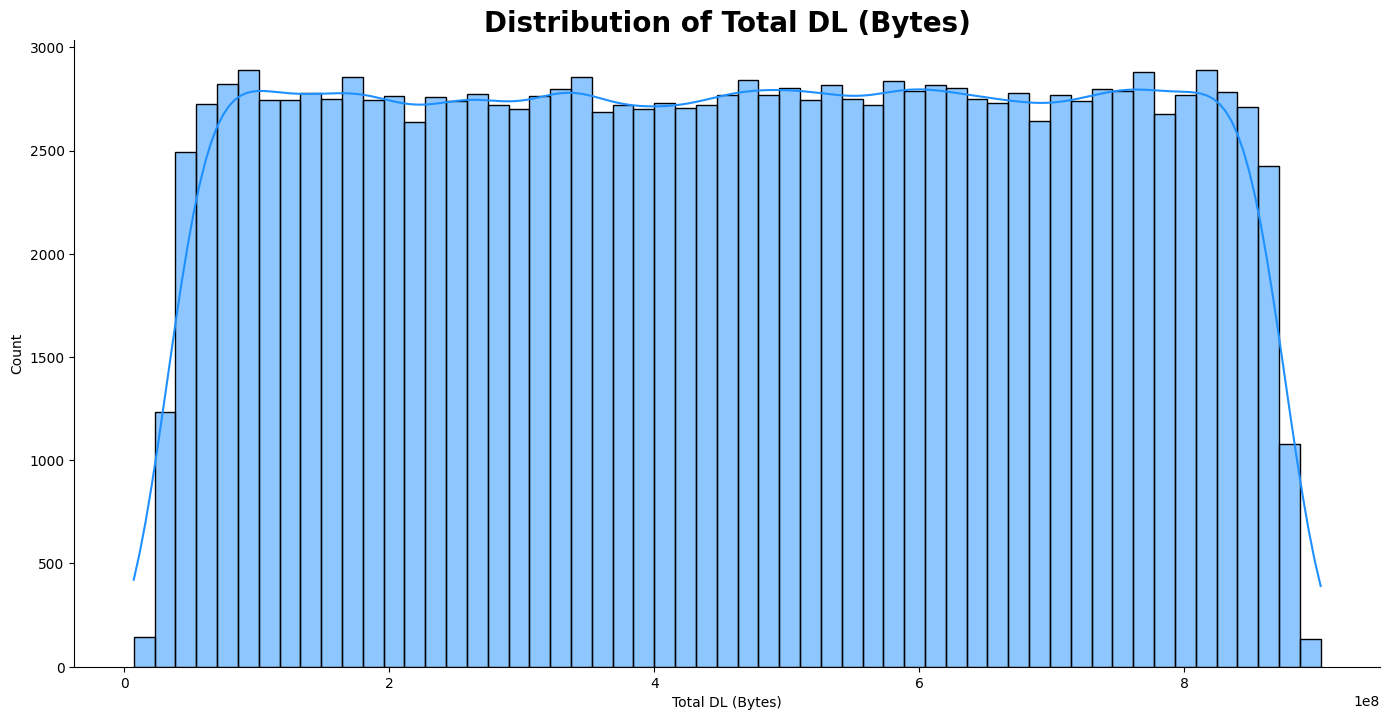

In [47]:
plot_hist(telecom_df, 'Total DL (Bytes)', '#1E90FF')


Social Media Total Upload and Download Data

In [48]:
telecom_df["Social_Media_Total_Data"].describe()

count    1.485060e+05
mean     1.828066e+06
std      1.035638e+06
min      1.563000e+03
25%      9.321828e+05
50%      1.825931e+06
75%      2.727493e+06
max      3.650861e+06
Name: Social_Media_Total_Data, dtype: float64

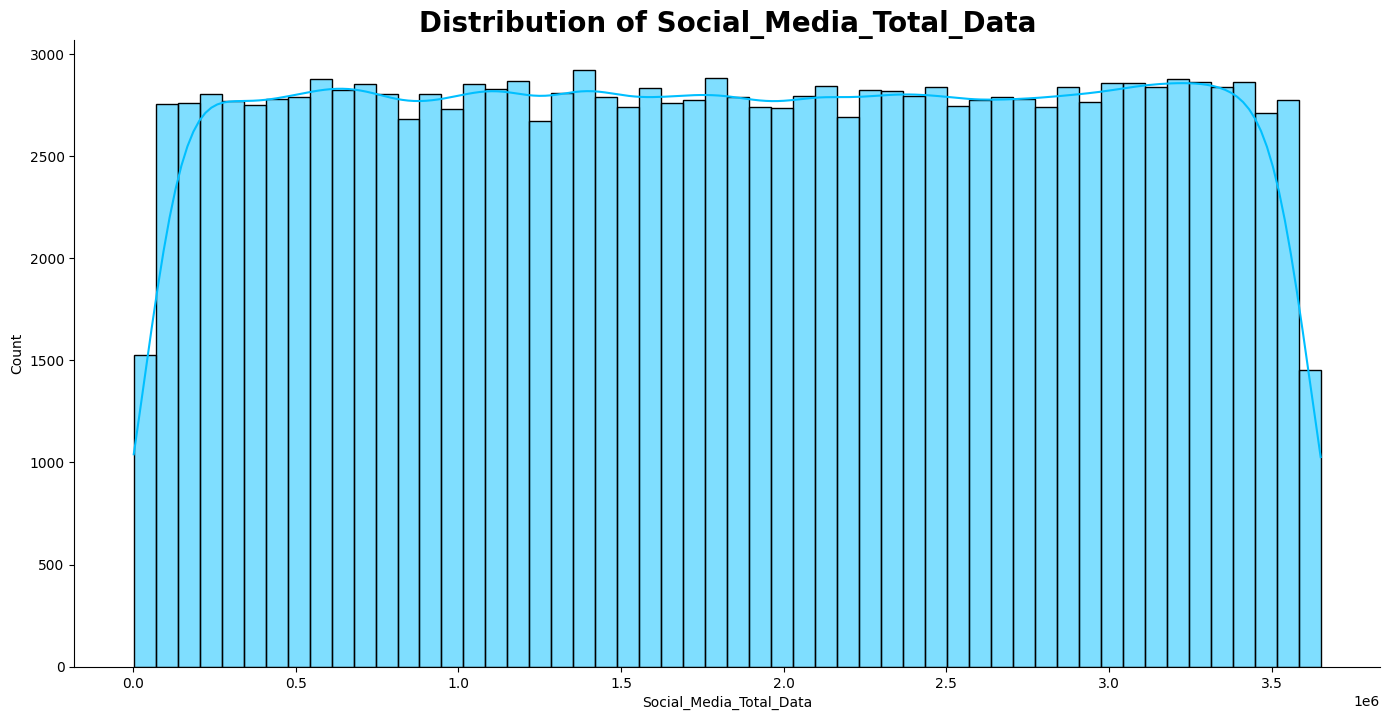

In [49]:
plot_hist(telecom_df, 'Social_Media_Total_Data', '#00BFFF')



Google Total Data

In [50]:
telecom_df[['Google_Total_Data']].describe()

,Google_Total_Data
count,1.485060e+05
mean,7.808063e+06
std,3.516724e+06
min,4.033000e+04
25%,4.944994e+06
50%,7.815669e+06
75%,1.068307e+07
max,1.552878e+07


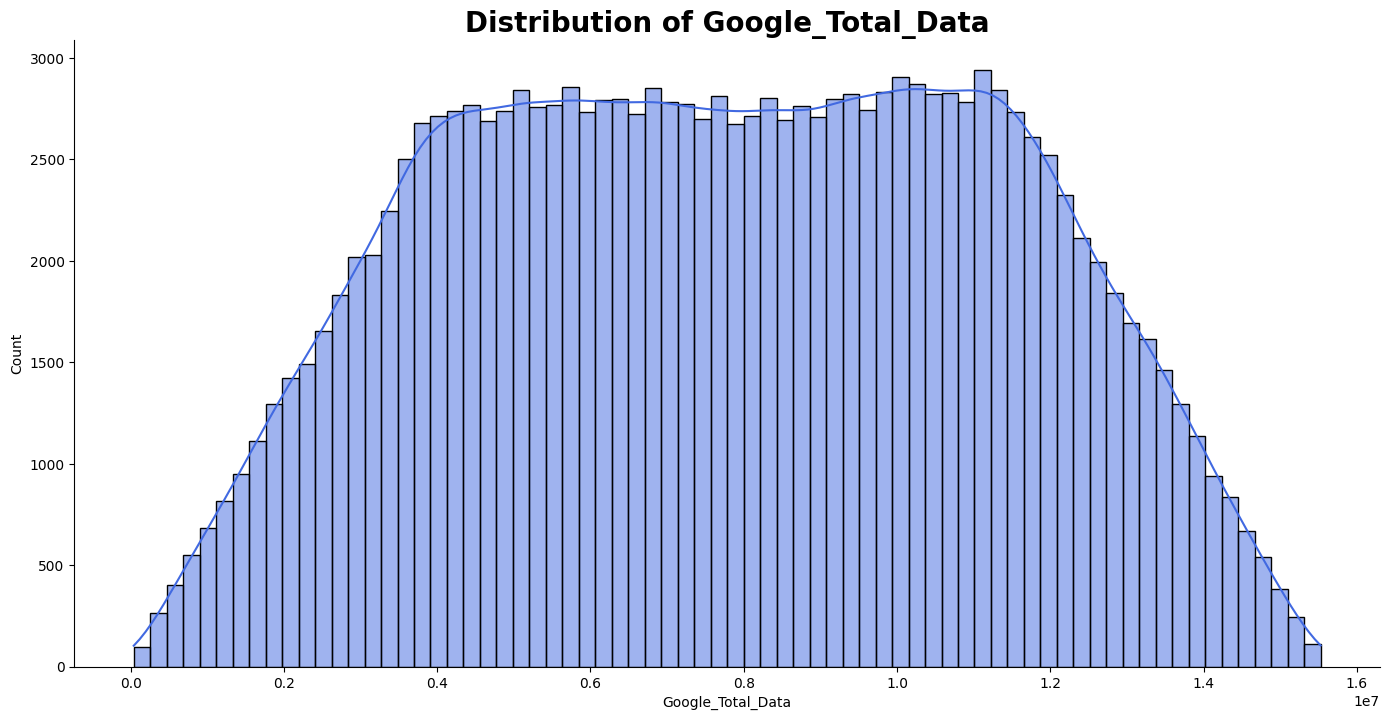

In [52]:
plot_hist(telecom_df, 'Google_Total_Data', '#4169E1')


Total Email Data

In [53]:
telecom_df[['Email_Total_Data']].describe()


,Email_Total_Data
count,1.485060e+05
mean,2.259188e+06
std,1.071152e+06
min,8.359000e+03
25%,1.359336e+06
50%,2.264186e+06
75%,3.160024e+06
max,4.518036e+06


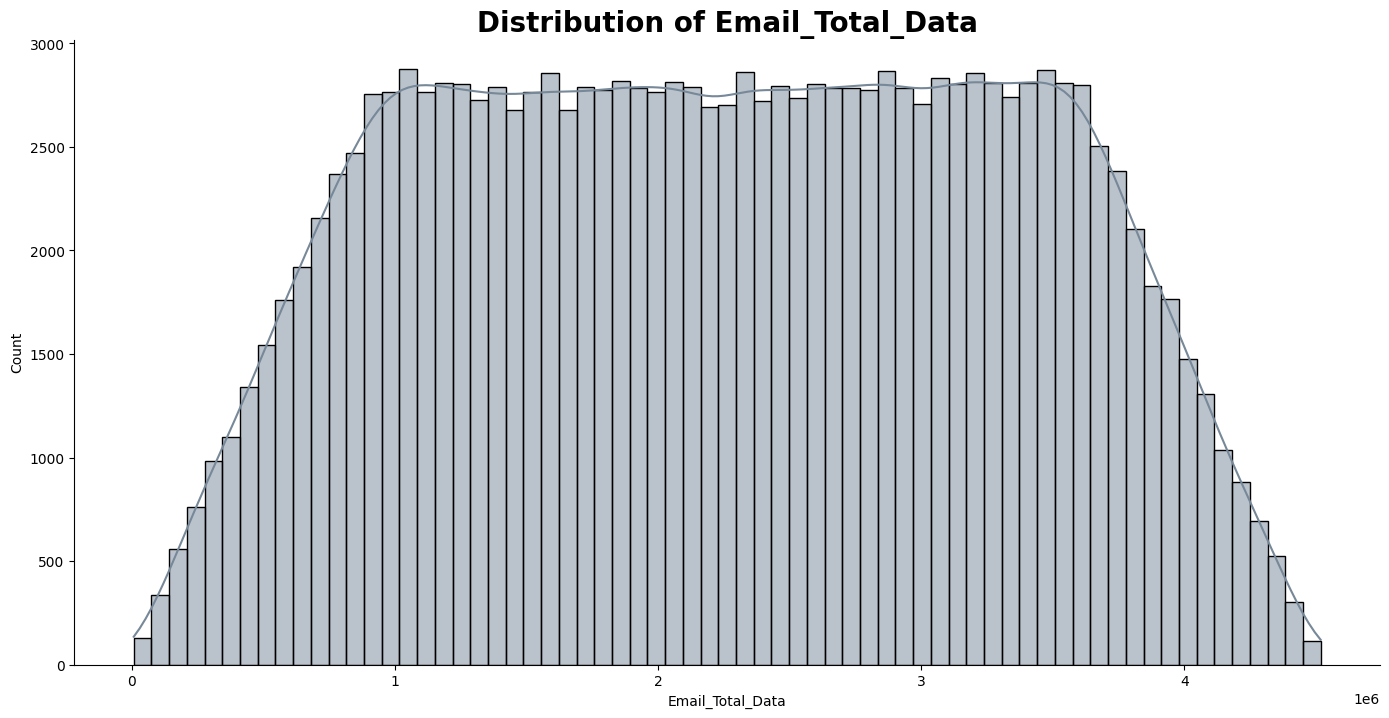

In [54]:
plot_hist(telecom_df, 'Email_Total_Data', '#778899')

Total Youtube Data


In [55]:
telecom_df[['Youtube_Total_Data']].describe()


,Youtube_Total_Data
count,1.485060e+05
mean,2.264244e+07
std,9.247684e+06
min,7.890300e+04
25%,1.599374e+07
50%,2.266131e+07
75%,2.929824e+07
max,4.519008e+07


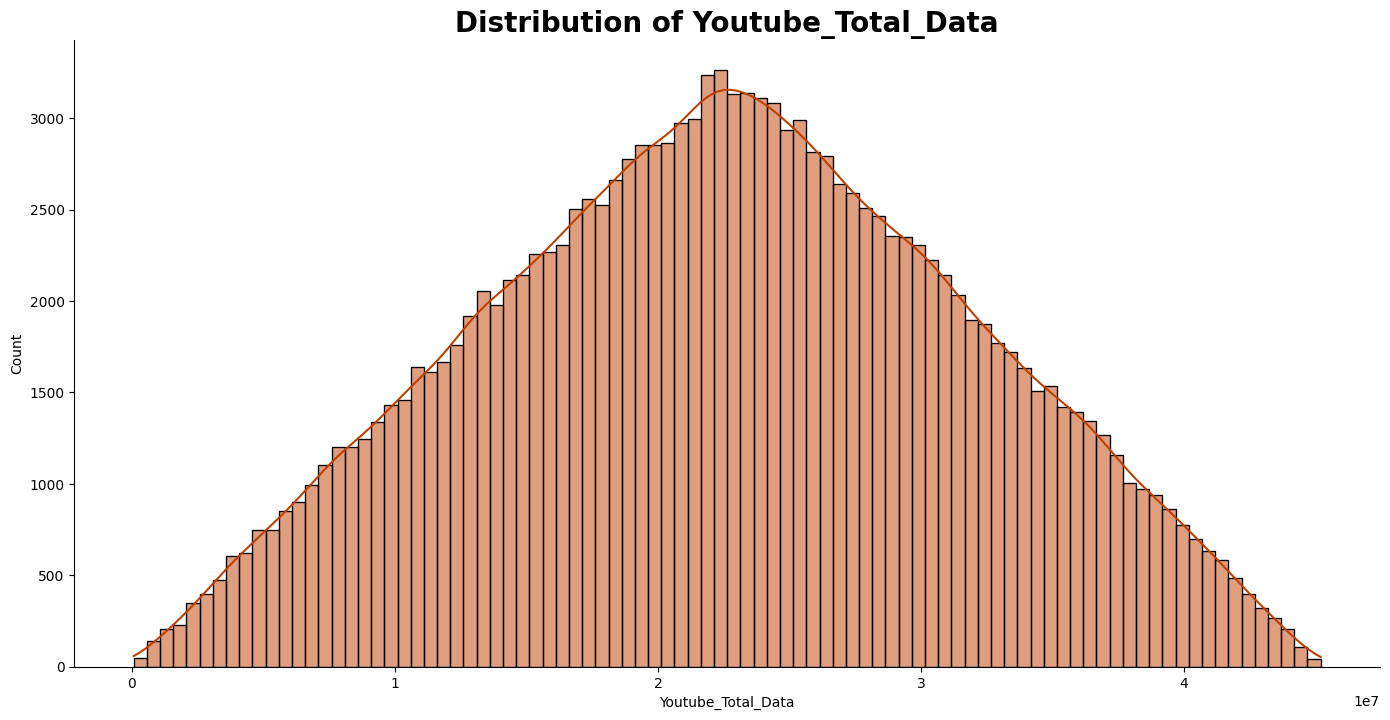

In [56]:
plot_hist(telecom_df, 'Youtube_Total_Data', '#C04000')




Total Netflix Data

In [57]:
telecom_df[['Netflix_Total_Data']].describe()


,Netflix_Total_Data
count,1.485060e+05
mean,2.262914e+07
std,9.260477e+06
min,9.843200e+04
25%,1.598016e+07
50%,2.263632e+07
75%,2.928832e+07
max,4.519815e+07


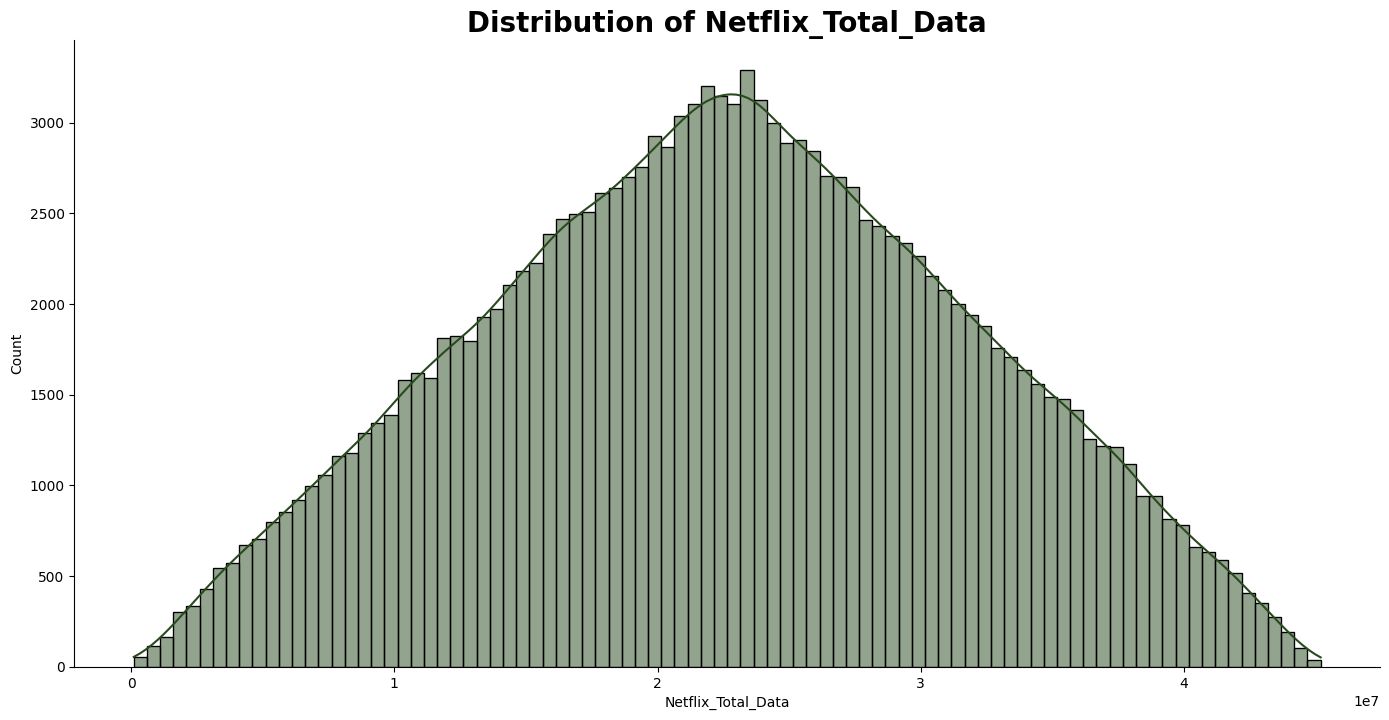

In [58]:
plot_hist(telecom_df, 'Netflix_Total_Data', color="#294a1f")


Total Gaming Data

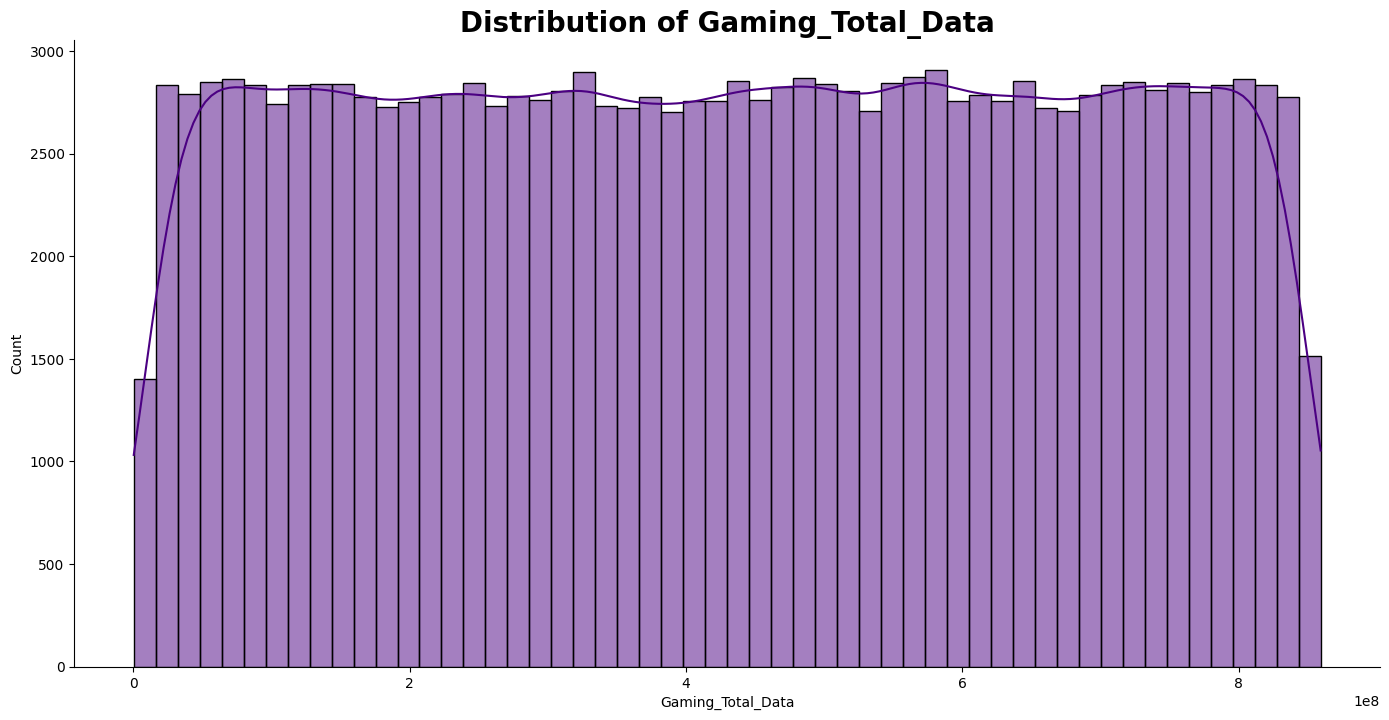

In [59]:
plot_hist(telecom_df, 'Gaming_Total_Data', 'indigo')




Other Total Data


In [60]:
telecom_df[['Other_Total_Data']].describe()

,Other_Total_Data
count,1.485060e+05
mean,4.294152e+08
std,2.432284e+08
min,1.490450e+05
25%,2.186682e+08
50%,4.300438e+08
75%,6.398960e+08
max,8.595209e+08


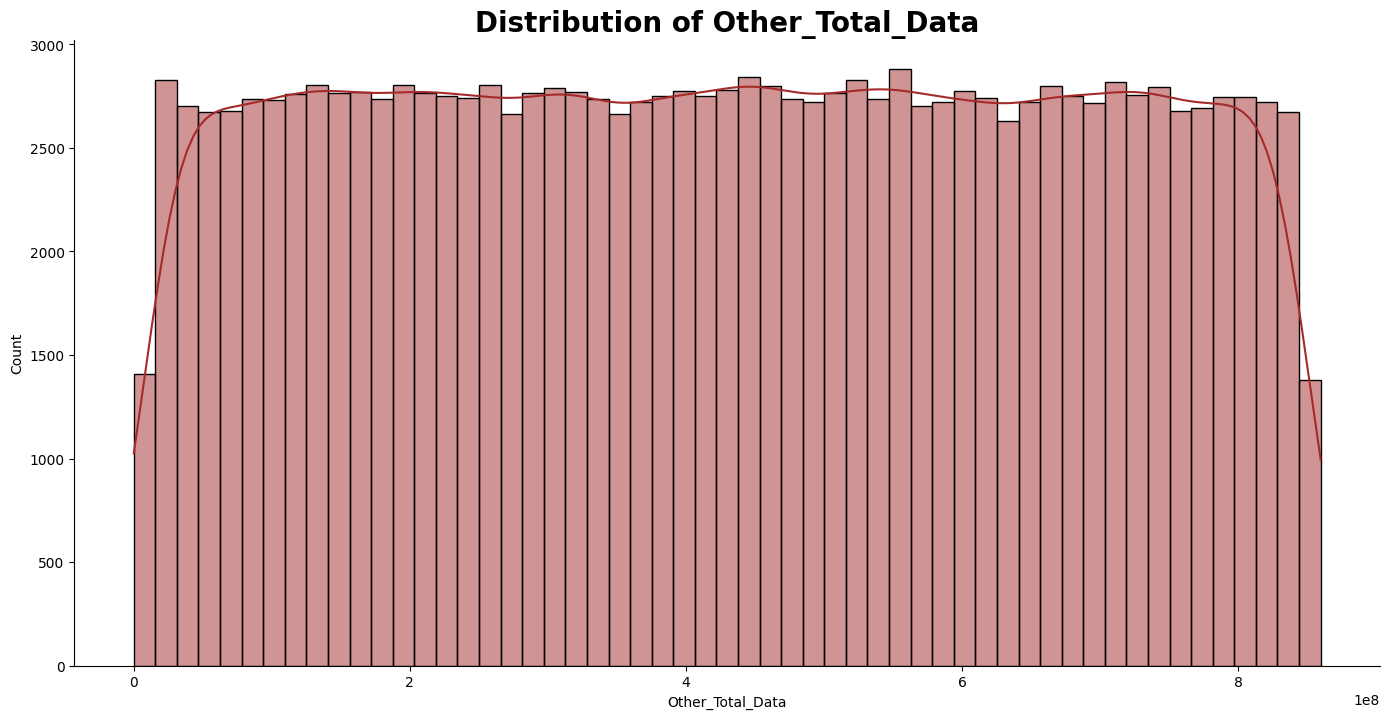

In [61]:
plot_hist(telecom_df, 'Other_Total_Data', '#A52A2A')

Bivariate Analysis 

explore the relationship between each application & the total DL+UL data

In [19]:
sample_data = telecom_df.sample(frac=0.000099)
print(sample_data.shape)
sum_column = sample_data["Total DL (Bytes)"] + sample_data["Total UL (Bytes)"]

(15, 52)


In [20]:
sample_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


In [21]:
telecom_df["Youtube_Total_Data"]=telecom_df["Youtube DL (Bytes)"]+telecom_df["Youtube UL (Bytes)"]
telecom_df["Google_Total_Data"]=telecom_df["Google DL (Bytes)"]+telecom_df["Google UL (Bytes)"]
telecom_df["Email_Total_Data"]=telecom_df["Email DL (Bytes)"]+telecom_df["Email UL (Bytes)"]
telecom_df["Social_Media_Total_Data"]=telecom_df["Social Media DL (Bytes)"]+telecom_df["Social Media UL (Bytes)"]
telecom_df["Netflix_Total_Data"]=telecom_df["Netflix DL (Bytes)"]+telecom_df["Netflix UL (Bytes)"]
telecom_df["Gaming_Total_Data"]=telecom_df["Gaming DL (Bytes)"]+telecom_df["Gaming UL (Bytes)"]
telecom_df["Other_Total_Data"]=telecom_df["Other DL (Bytes)"]+telecom_df["Other UL (Bytes)"]
telecom_df["Total UL and DL"]=telecom_df["Total UL (Bytes)"]+telecom_df["Total DL (Bytes)"]


In [22]:
columns = ['MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']

user_ratio_usage= telecom_df[columns].groupby('MSISDN/Number').sum()
user_ratio_usage.head(10)

,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
MSISDN/Number,,,,,,,,
3.360100e+10,21624548.0,4389005.0,1331362.0,2232135.0,27180981.0,8.124587e+08,3.865709e+08,8.786906e+08
3.360100e+10,12432223.0,5334863.0,3307781.0,2660565.0,11221763.0,1.197501e+08,2.817101e+08,1.568596e+08
3.360100e+10,21333570.0,3443126.0,3205380.0,3195623.0,19353900.0,5.388277e+08,5.016937e+08,5.959665e+08
3.360101e+10,6977321.0,9678493.0,2284670.0,280294.0,1942092.0,3.911261e+08,3.527970e+07,4.223207e+08
3.360101e+10,41533002.0,18499616.0,3305469.0,2912542.0,49201724.0,1.314798e+09,8.048045e+08,1.457411e+09
3.360101e+10,34347122.0,15263134.0,7848596.0,3792912.0,30315501.0,5.116358e+08,4.923728e+08,6.152172e+08
3.360101e+10,26431335.0,10196403.0,1358959.0,2769627.0,45812397.0,5.484611e+08,2.248887e+08,6.547231e+08
3.360101e+10,18892740.0,12023614.0,2215563.0,1782692.0,15292840.0,2.823644e+08,1.782015e+08,3.326604e+08
3.360101e+10,63443802.0,14134211.0,4599825.0,5288685.0,54216117.0,8.330880e+08,1.041883e+09,9.901322e+08


In [23]:
apps_columns = ['Dur. (ms)','MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']


In [24]:
user_ratio_usage = telecom_df[apps_columns]

user_ratio_usage.columns

Index(['Dur. (ms)', 'MSISDN/Number', 'Youtube_Total_Data', 'Google_Total_Data',
       'Email_Total_Data', 'Social_Media_Total_Data', 'Netflix_Total_Data',
       'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL'],
      dtype='object')

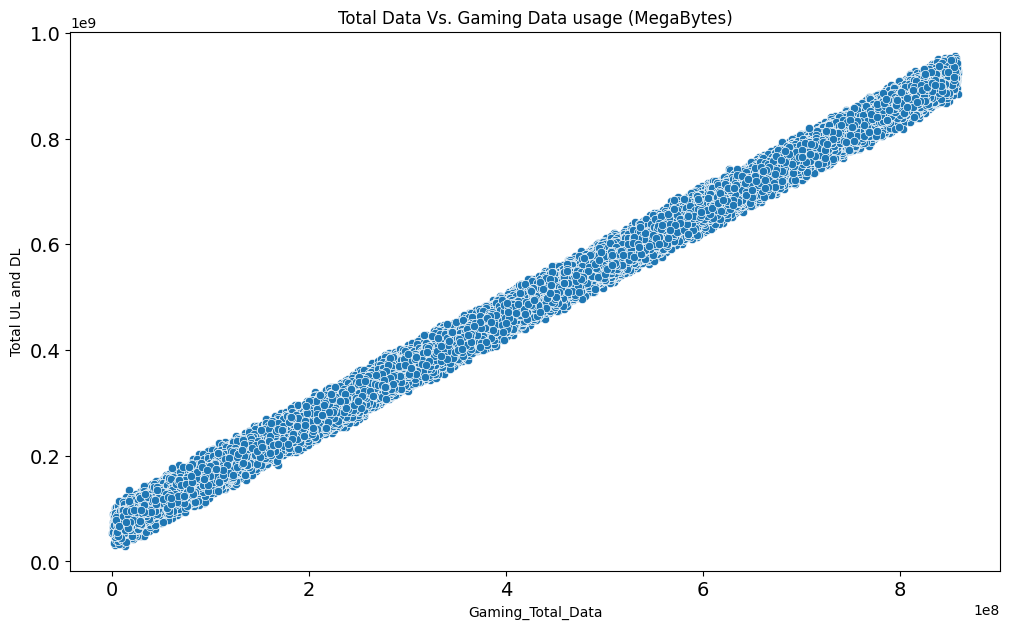

In [25]:
plot_scatter(user_ratio_usage,'Gaming_Total_Data', 'Total UL and DL', 'Total Data Vs. Gaming Data usage (MegaBytes)')


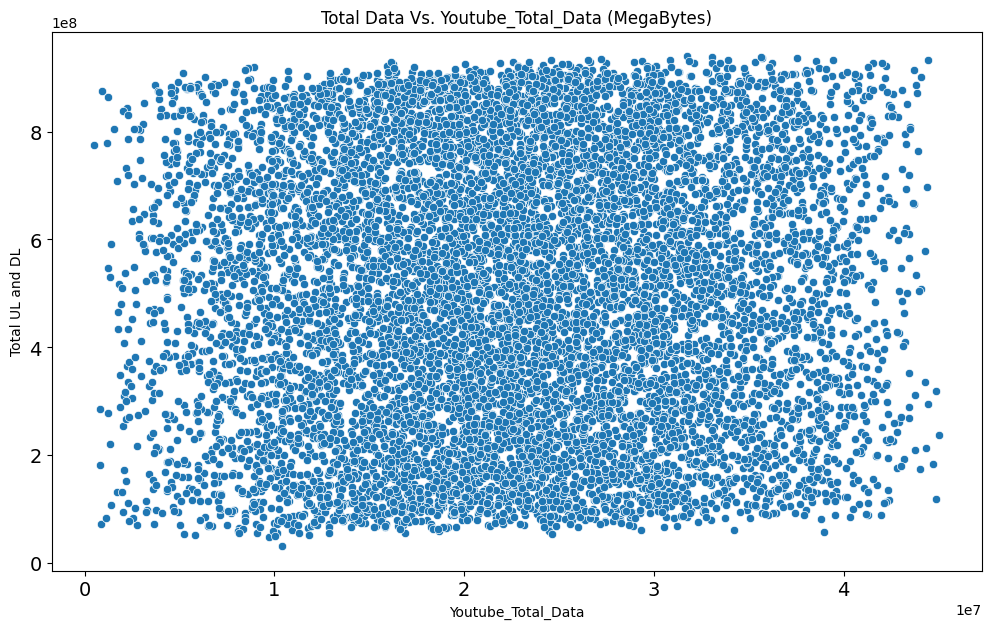

In [26]:
plot_scatter(user_ratio_usage.sample(10000), 'Youtube_Total_Data', 'Total UL and DL', 'Total Data Vs. Youtube_Total_Data (MegaBytes)')



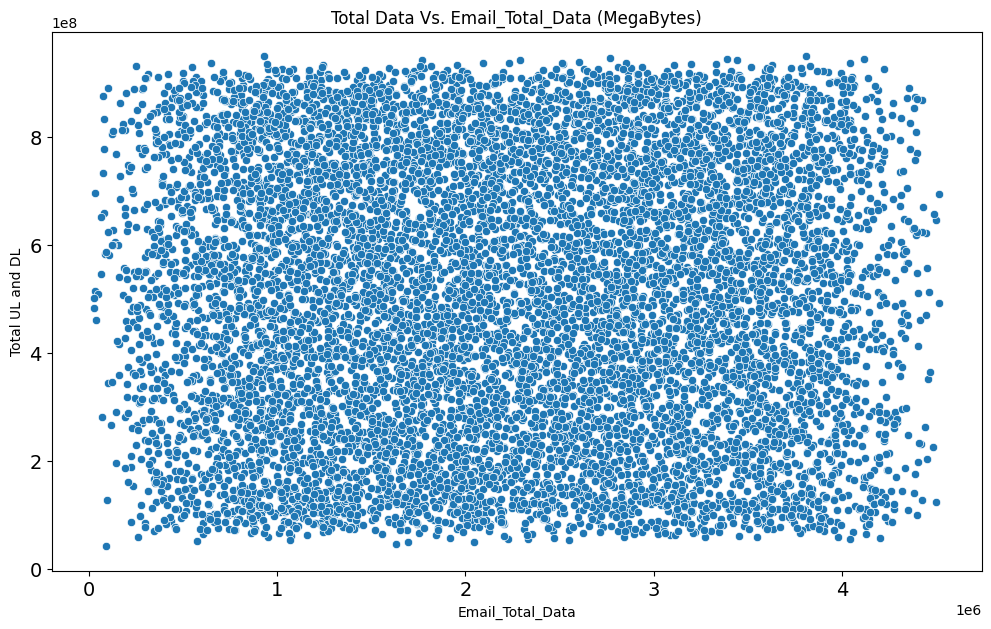

In [27]:
plot_scatter(user_ratio_usage.sample(10000), 'Email_Total_Data', 'Total UL and DL', 'Total Data Vs. Email_Total_Data (MegaBytes)')



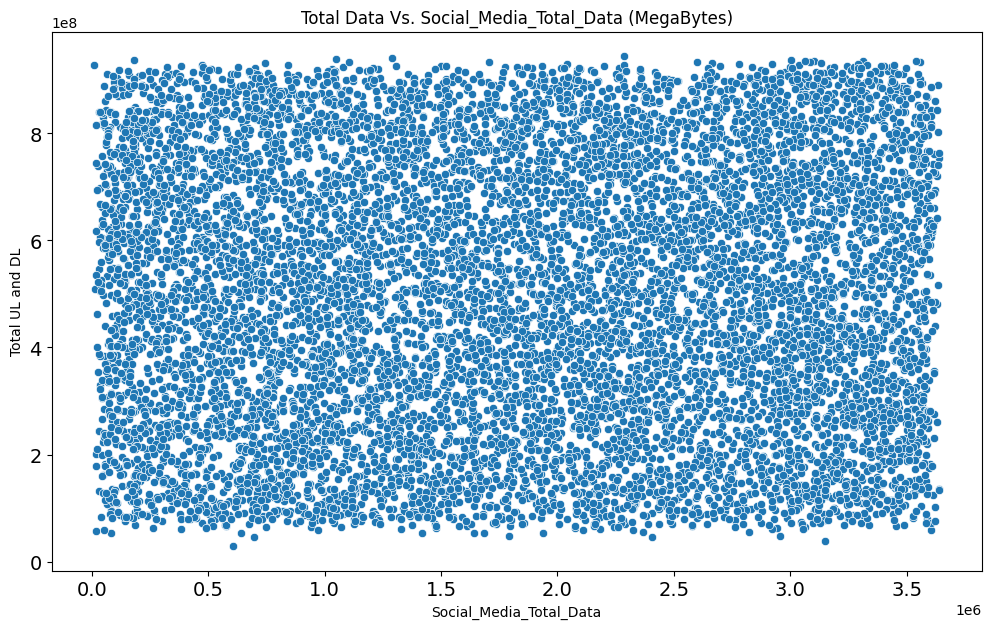

In [28]:
plot_scatter(user_ratio_usage.sample(10000), 'Social_Media_Total_Data', 'Total UL and DL', 'Total Data Vs. Social_Media_Total_Data (MegaBytes)')



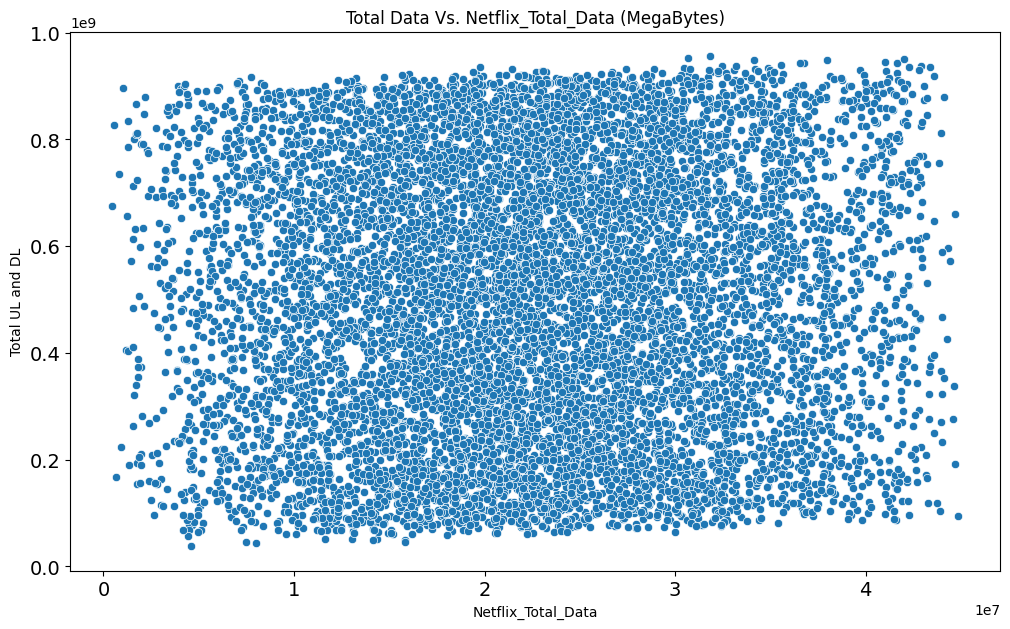

In [29]:
plot_scatter(user_ratio_usage.sample(10000), 'Netflix_Total_Data', 'Total UL and DL', 'Total Data Vs. Netflix_Total_Data (MegaBytes)')


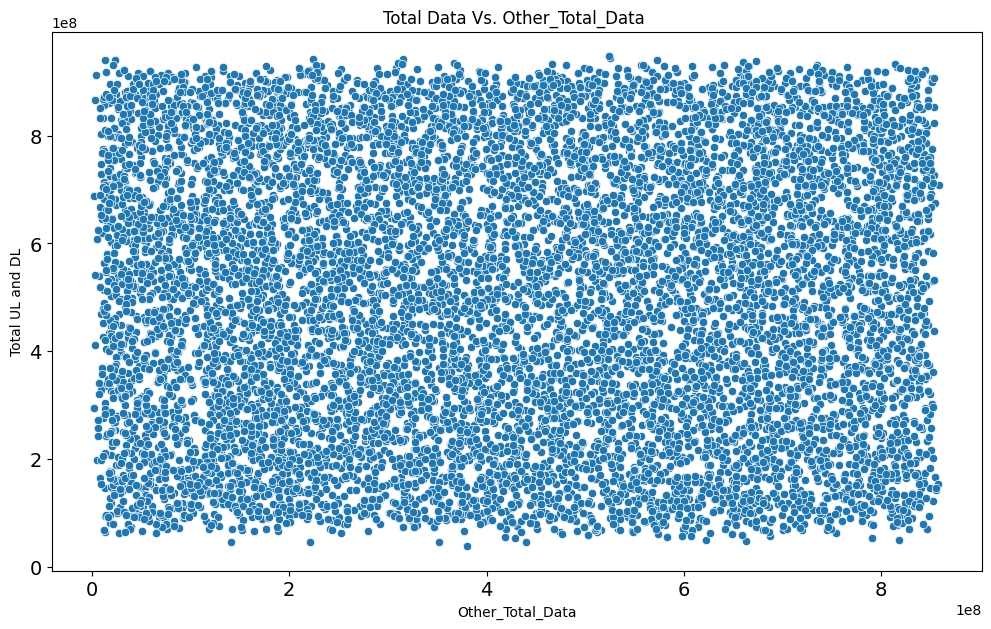

In [30]:
plot_scatter(user_ratio_usage.sample(10000), 'Other_Total_Data', 'Total UL and DL', 'Total Data Vs. Other_Total_Data ')



Variable transformations

segmenting the users into top 5 decile classes

/tmp/ipykernel_85473/2030566624.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax=telecom_df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])


Text(0, 0.5, 'Data Durations')

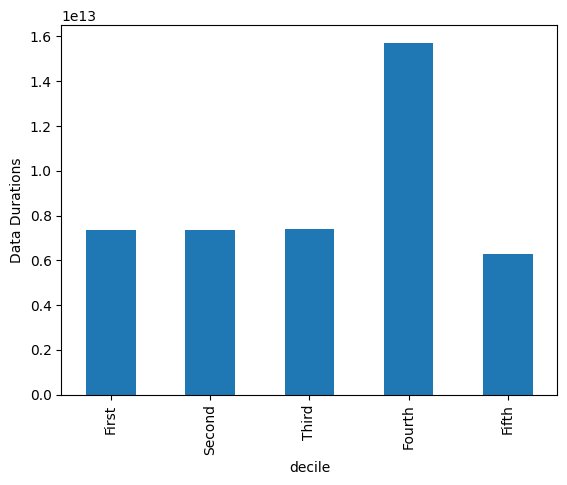

In [31]:
# compute the total dl and ul
telecom_df['total_data'] = telecom_df["Total DL (Bytes)"] + telecom_df["Total UL (Bytes)"]

# compute the decile classes
telecom_df['decile'] = pd.qcut(telecom_df['Dur. (ms)'],10, duplicates='drop')

ax=telecom_df.groupby('decile')['total_data'].sum().head(5).plot(kind='bar', xticks=[0,1,2,3,4])
ax.set_xticklabels(['First','Second','Third','Fourth','Fifth'])
ax.set_ylabel('Data Durations')


Correlation Analysis

In [32]:
columns = ['Youtube_Total_Data', 'Google_Total_Data', 'Email_Total_Data','Social_Media_Total_Data', 'Netflix_Total_Data', 'Gaming_Total_Data', 'Other_Total_Data', 'Total UL and DL']
corr = user_ratio_usage[columns].corr()
corr


,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
Youtube_Total_Data,1.000000,0.002635,-0.003098,0.000568,0.003252,-0.003141,0.003089,0.034769
Google_Total_Data,0.002635,1.000000,-0.000386,-0.001907,-0.001997,-0.000893,-0.001647,0.013480
Email_Total_Data,-0.003098,-0.000386,1.000000,0.004282,0.001409,-0.000511,-0.001096,0.003907
Social_Media_Total_Data,0.000568,-0.001907,0.004282,1.000000,0.001497,0.001559,0.005635,0.005881
Netflix_Total_Data,0.003252,-0.001997,0.001409,0.001497,1.000000,-0.003278,-0.008701,0.034635
Gaming_Total_Data,-0.003141,-0.000893,-0.000511,0.001559,-0.003278,1.000000,-0.002966,0.998254
Other_Total_Data,0.003089,-0.001647,-0.001096,0.005635,-0.008701,-0.002966,1.000000,-0.002724
Total UL and DL,0.034769,0.013480,0.003907,0.005881,0.034635,0.998254,-0.002724,1.000000


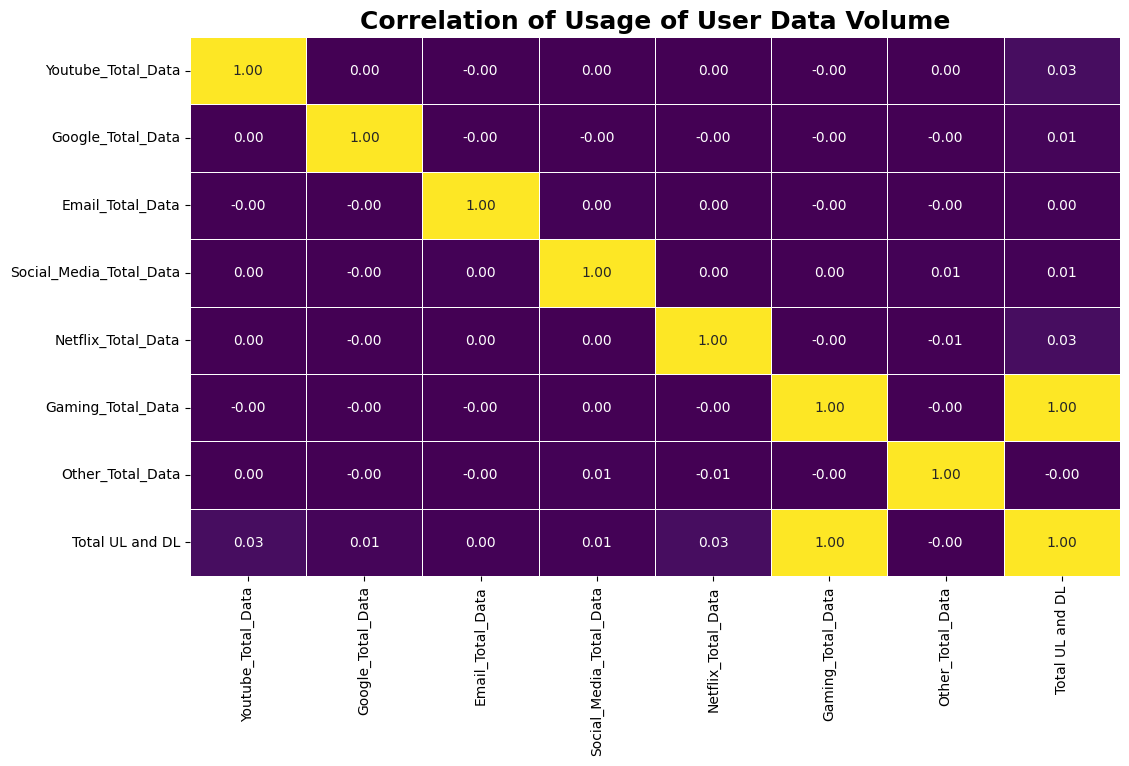

In [33]:
plot_heatmap(corr, "Correlation of Usage of User Data Volume")



Dimensionality Reduction

In [34]:
numeric_df = user_ratio_usage.select_dtypes(include='float64') 

In [35]:
numeric_df.describe()

,Dur. (ms),MSISDN/Number,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Total UL and DL
count,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05,1.485060e+05
mean,1.050841e+05,4.190654e+10,2.264244e+07,7.808063e+06,2.259188e+06,1.828066e+06,2.262914e+07,4.303538e+08,4.294152e+08,4.957834e+08
std,8.107274e+04,2.450976e+12,9.247684e+06,3.516724e+06,1.071152e+06,1.035638e+06,9.260477e+06,2.440569e+08,2.432284e+08,2.444146e+08
min,7.142000e+03,3.360100e+10,7.890300e+04,4.033000e+04,8.359000e+03,1.563000e+03,9.843200e+04,3.063580e+05,1.490450e+05,2.895611e+07
25%,5.824875e+04,3.365131e+10,1.599374e+07,4.944994e+06,1.359336e+06,9.321828e+05,1.598016e+07,2.187362e+08,2.186682e+08,2.845286e+08
50%,8.639900e+04,3.366371e+10,2.266131e+07,7.815669e+06,2.264186e+06,1.825931e+06,2.263632e+07,4.316585e+08,4.300438e+08,4.969225e+08
75%,1.329328e+05,3.368352e+10,2.929824e+07,1.068307e+07,3.160024e+06,2.727493e+06,2.928832e+07,6.415282e+08,6.398960e+08,7.065677e+08
max,1.859336e+06,8.823971e+14,4.519008e+07,1.552878e+07,4.518036e+06,3.650861e+06,4.519815e+07,8.592028e+08,8.595209e+08,9.559848e+08


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(numeric_df)


StandardScaler()

In [37]:
scaled_data = scaler.transform(numeric_df)


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(scaled_data)


PCA(n_components=10)

In [39]:
x_pca = pca.transform(scaled_data)


Text(0, 0.5, 'Second Principal Component')

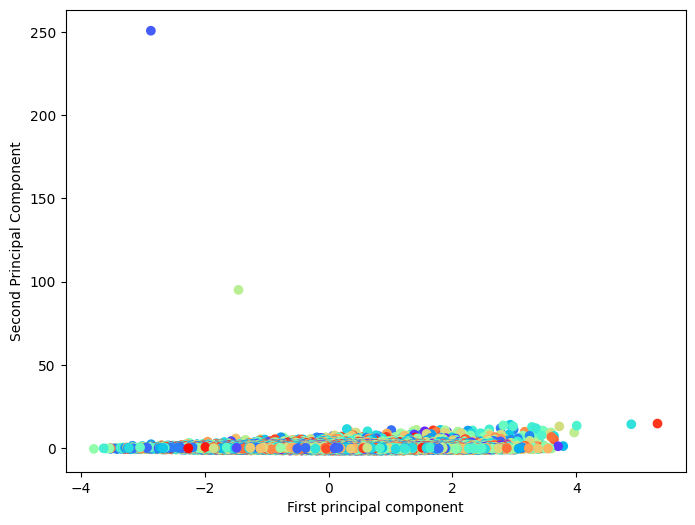

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,4],x_pca[:,1],c=user_ratio_usage['Total UL and DL'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')


Text(0, 0.5, 'Cumulative explained variance')

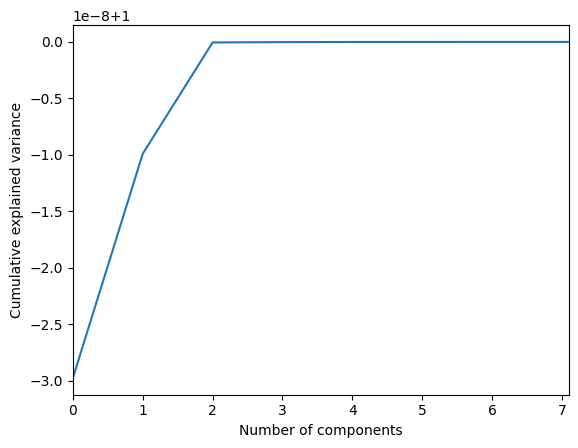

In [41]:
from sklearn.decomposition import PCA
pca = PCA().fit(numeric_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7.1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



In [42]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(numeric_df)
Y_sklearn

array([[-8.24157941e+09,  2.02724828e+08, -2.49667936e+08,
         1.06903442e+07,  4.02451815e+05, -4.11174751e+06],
       [-8.22468751e+09, -2.76030736e+08,  1.13646232e+08,
        -3.03315080e+07,  2.66899041e+06, -4.05441500e+06],
       [-8.14591452e+09,  2.74618631e+08, -1.56004043e+07,
        -1.28958714e+07,  7.56271423e+06,  9.60396195e+05],
       ...,
       [-8.24309199e+09, -2.89683426e+08,  2.86374237e+08,
        -1.24669611e+07, -1.31599092e+07, -6.20593035e+06],
       [-8.28465173e+09, -1.91028452e+08, -2.96239219e+08,
         5.38446258e+06,  6.78466906e+06, -3.22809682e+05],
       [-8.28691972e+09,  1.21448553e+08,  3.86221651e+08,
         1.53795441e+07,  2.90712682e+05, -1.31627843e+06]])

In [43]:
#export user overview data to csv

user_ratio_usage.to_csv('../data/user_overview_data.csv',index=False)

